# 基于数据挖掘技术的葡萄酒品质预测

## 组员分工
郭浩：数据分析与可视化，模型实现（DecisionTreeClassifier、RandomForestClassifier、SVM、KNeighborsClassifier、MLP、CNN），文档编写  
张鑫：数据处理与分析，模型实现（LinearRegression、LogisticRegression、SVC、DecisionTreeRegressor、RandomForestRegressor），文档编写  
王瞳：数据处理与分析，文档编写  
张旭：数据分析与可视化，文档编写  
纪泓宇：数据分析与可视化，文档编写  

## 项目地址
https://github.com/1149645707/Data-Mining/tree/main/course_project

## 项目的介绍

>&emsp;&emsp; 随着中国市场经济的蓬勃发展和人们对葡萄酒消费需求的迅速增长，葡萄酒行业正处于一个快速发展的时期。葡萄酒品质一直以来都是消费者以及生产者最关心的问题，尤其是对于中高档的葡萄酒来说，葡萄酒的品质高低近乎决定了它的价值高低。  
>&emsp;&emsp;   目前，感官分析是最传统、最常用的评判方法，但它也是一种极具主观性的方法。由于感官分析是由人类专家执行的，人的感官味觉是一种特殊的属性，很难客观地描述一款酒的品质。随着现代酿酒技术的不断提高，在设定的时间间隔内进行物理测试和化学测试，从中提取有价值的信息已经成为现实。而且在葡萄酒发酵过程中，这些周期性地监测也是不容忽视的，因为它是预测发酵行为的关键，根据发酵过程中提取有用的信息进行研究分析对于预测酒的质量具有极大的帮助。因此，基于实验测试的理化分析方法成为该领域的一个重要研究方向。  
>&emsp;&emsp; 而另一个更有效的方式便是将数据挖掘技术结合理化指标进行品质分析，如何根据发酵过程中提取的有用信息，比如：酒精含量，PH值等推测酒的质量呢？这是我们想要解决的问题。  
>&emsp;&emsp; **使用的数据集：Wine Quality数据集，每一条数据包含12个属性，其中包括quality属性，质量分为0-10级。我们尝试使用逻辑回归、决策树和随机森林等方法和深度学习方法来解决这个问题。**  
项目文档简介：项目文档可以分成两大部分：  
>&emsp;&emsp; 1.数据预处理和数据分析（包含wineQualityWhites dataset 和 wineQualityReds dataset）；  
>&emsp;&emsp; 2.质量预测模型（包含机器学习，如Linear Regression，Logistic Regression,SVC,randomForest等，和深度学习，如MLP和CNN）  
>&emsp;&emsp; 3.总结（对实验结果的简单分析）

# 1.数据预处理
具体来讲，我们包含两个数据集，一个是wineQualityWhites还有一个wineQualityReds，数据集均以csv存储

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## 1.1读取数据以及基本数据信息   
### 1.1.1首先对wineQualityWhites数据集进行处理
使用pandas.read_csv()函数读取文件中的数据。
从下图可以看出，在wineQualityWhites.csv文件中，有4898条数据，每条数据包含12个属性，其中最后一个质量属性quality，是每条数据对应的 label.

In [4]:
df_w = pd.read_csv("../data/wineQualityWhites.csv",usecols=range(1,13))
df_w

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


下面的代码显示了wineQualityWhites数据中每个属性的总数，均值，标准差，五分位数

In [49]:
df_w.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


接着对数据集进行处理，转换成适合数据挖掘的形式。
首先分属性对数据的值缺失情况进行了统计，从下面的表格可以看出数据很完整，没有缺失数值

In [50]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         4898 non-null   float64
 1   volatile.acidity      4898 non-null   float64
 2   citric.acid           4898 non-null   float64
 3   residual.sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free.sulfur.dioxide   4898 non-null   float64
 6   total.sulfur.dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


计算任意两项之间的相关系数
白酒数据集的相关系数矩阵如下图所示

In [51]:
df_w.corr()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile.acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric.acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual.sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free.sulfur.dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total.sulfur.dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


### 1.1.2再对wineQualityReds数据集进行处理
使用pandas.read_csv()读取wineQualityReds的数据
从下图可以看出，在wineQualityReds.csv文件中，有1599条数据，每条数据包含12个属性，其中最后一个质量属性quality，是每条数据对应的label.

In [5]:
df_r = pd.read_csv("../data/wineQualityReds.csv",usecols=range(1,13))
df_r

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


下面的代码显示了wineQualityReds数据中每个属性的总数，均值，标准差，五分位数

In [53]:
df_r.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


分属性对wineQualityReds数据的值缺失情况进行了统计，从下面的表格可以看出数据很完整，没有缺失数值

In [54]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


计算任意两项之间的相关系数
红酒数据集的相关系数矩阵如下图所示

In [55]:
df_r.corr()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile.acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric.acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual.sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free.sulfur.dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total.sulfur.dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## **1.2数据的可视化分析**  
### **1.2.1WineQualityWhites数据集的可视化分析**

计算WineQualityWhites数据集变量之间的组合关系
WineQualityWhites数据集热力图展示
可以看出质量一栏中，与质量正相关的几种属性分别为：酒精(alcohol)、硫酸盐(sulphates)、pH,与质量逆相关性的几种属性分别为：挥发性酸(volatile.acidity)、密度(density)、氯化物(chlorides)

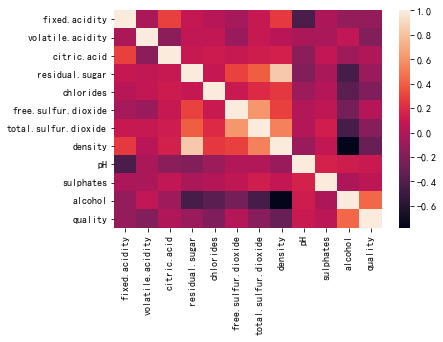

In [56]:
sns.heatmap(df_w.corr())

对每个属性的数值进行四舍五入的处理，方便后续的散点图制作，并规范化到相同的数值范围

In [57]:
df_w['fixed.acidity'] = np.round(df_w['fixed.acidity'])
df_w['alcohol'] = np.round(df_w['alcohol'])
df_w['sulphates'] = np.round(df_w['sulphates']*100)
df_w['pH'] = np.round(df_w['pH'])
df_w['residual.sugar'] = np.round(df_w['residual.sugar'])
df_w['volatile.acidity'] = np.round(df_w['volatile.acidity']*100)
df_w['citric.acid'] = np.round(df_w['citric.acid']*100)
df_w['chlorides'] = np.round(df_w['chlorides']*100)
df_w['density'] = np.round(df_w['density']*10000)

画出'citric acid'属性对应的质量分布，从图上可以看出，在quality=6时，点数较多，也就是说但从citric acid属性来看，quality=6的样品占大多数

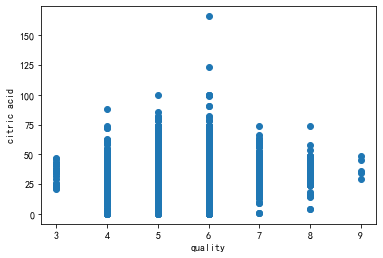

In [58]:
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.scatter(x=df_w['quality'],y=df_w['citric.acid'])

从散点图来看稍微有一些不太明朗，我们利用bar图可以直接看出分布的百分比模式

[0, 0, 0, 0.004083299305839118, 0.03327888934258881, 0.2974683544303797, 0.44875459371171905, 0.17966516945692118, 0.03572886892609228, 0.0010208248264597796, 0]


Text(0, 0.5, "'citric acid'属性对应的质量分布")

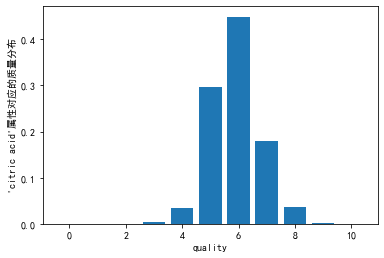

In [59]:

res=df_w['quality'].value_counts(normalize=True)
num_list=[]
for i in range(0,11):
    if(i in res.index):
        num_list.append(res[i])
    else:
        num_list.append(0)
print(num_list)
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）
plt.bar(range(0,11),num_list)
plt.xlabel('quality')
plt.ylabel('\'citric acid\'属性对应的质量分布')

对其他的属性也可以进行上述的图形化展示，比如'fixed.acidity'属性

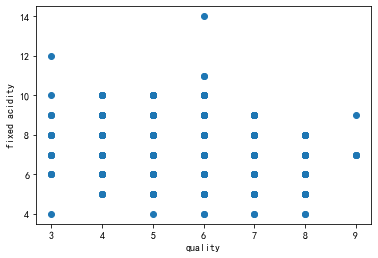

In [60]:
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.scatter(x=df_w['quality'],y=df_w['fixed.acidity'])

x坐标是质量指标【0-10】，y坐标是pH值，size大小根据free.sulfur.dioxide（游离态的SO2）属性值来区分,从下图中可以看出，pH值都在3~4左右，质量越高，二氧化硫的浓度越低

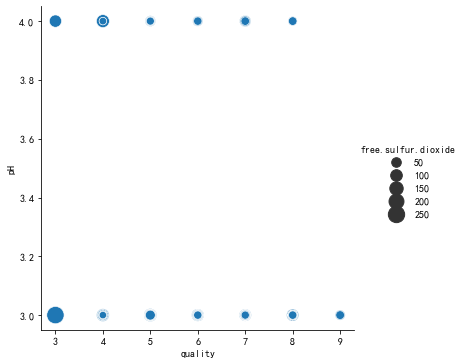

In [62]:
sns.relplot(x="quality", y="pH", size="free.sulfur.dioxide", sizes=(50,300), data=df_w)

同样的方式画出'free.sulfur.dioxide'与属性quality之间的分布关系
可以看出free.sulfur.dioxide在50-100之间pH接近3时，质量更高

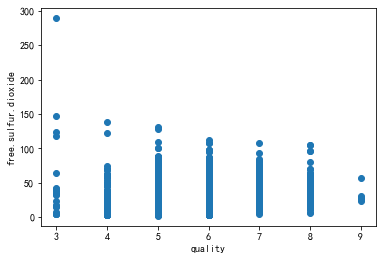

In [63]:
plt.xlabel('quality')
plt.ylabel('free.sulfur.dioxide')
plt.scatter(x=df_w['quality'],y=df_w['free.sulfur.dioxide'])

x坐标是质量指标【0-10】，y坐标是alcohol值，size大小根据pH属性值来区分,从下图中可以看出，pH值四舍五入为4，5。

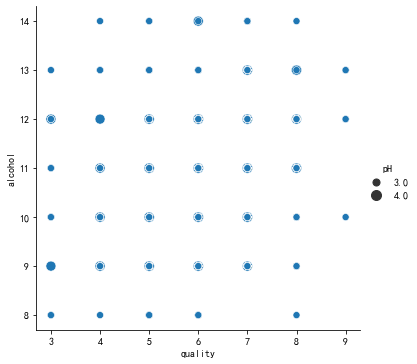

In [64]:
sns.relplot(x="quality", y="alcohol", size="pH", sizes=(50,100), data=df_w)

我们也可以使用盒形图来观察数据的分布情况,每个品质之下又根据pH的取值3或4来进行分类展示

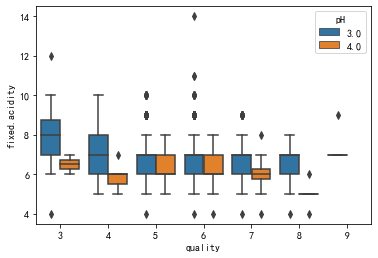

In [65]:
sns.boxplot(x='quality',y='fixed.acidity',data=df_w,hue='pH')

从上图可以看出，质量在5和6左右时，fixed.acidity异常离群点最多；相同质量下pH=4的fixed.acidity普遍低于pH=3的fxied.acidity的值。

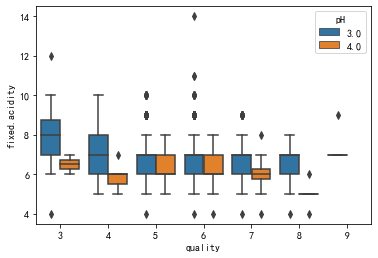

In [73]:
sns.boxplot(x="quality", y="fixed.acidity", hue="pH",data=df_w)

从上图可以看出，质量低时，pH=4的fixed.acidity一般低于pH=3的fixed.acidity；质量在5-6时，pH=3与pH=4的fixed.acidity相差不多；高质量的酒品pH=4的fixed.acidity也普遍低于pH=3的fixed.acidity。

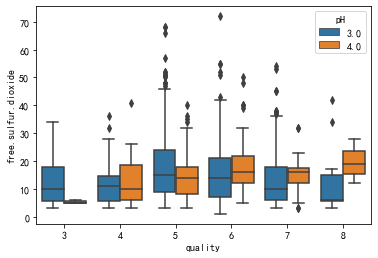

In [68]:
sns.boxplot(x="quality", y="free.sulfur.dioxide", hue="pH",data=df)

从上图可以看出，在酒品质量高时，pH=4的free.sulfur.dioxide普遍高于pH=3的free.sulfur.dioxide；在低质量pH=4的酒品中，含有很少的free.sulfur.dioxide

我们也可以使用小提琴图来观察数据的分布情况,每个品质之下又根据pH的取值3或4来进行分类展示

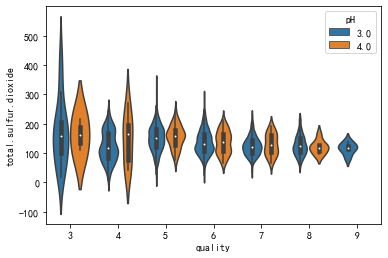

In [72]:
sns.violinplot(x="quality", y="total.sulfur.dioxide", hue="pH",data=df_w)

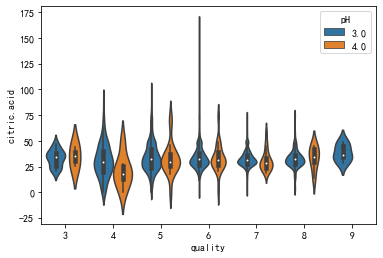

In [71]:
sns.violinplot(x="quality", y="citric.acid", hue="pH",data=df_w)

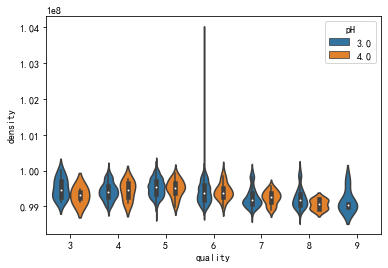

In [42]:
sns.violinplot(x="quality", y="density", hue="pH",data=df_w)

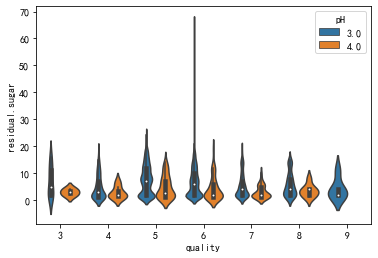

In [70]:
sns.violinplot(x="quality", y="residual.sugar", hue="pH",data=df_w)

统计各个质量下的样本综总数

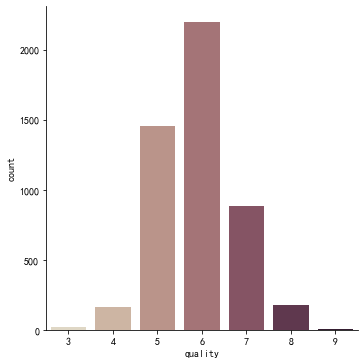

In [69]:
sns.catplot(x="quality", kind="count",palette="ch:.30",data=df_w)

在这里我们展示两两变量之间的关系图

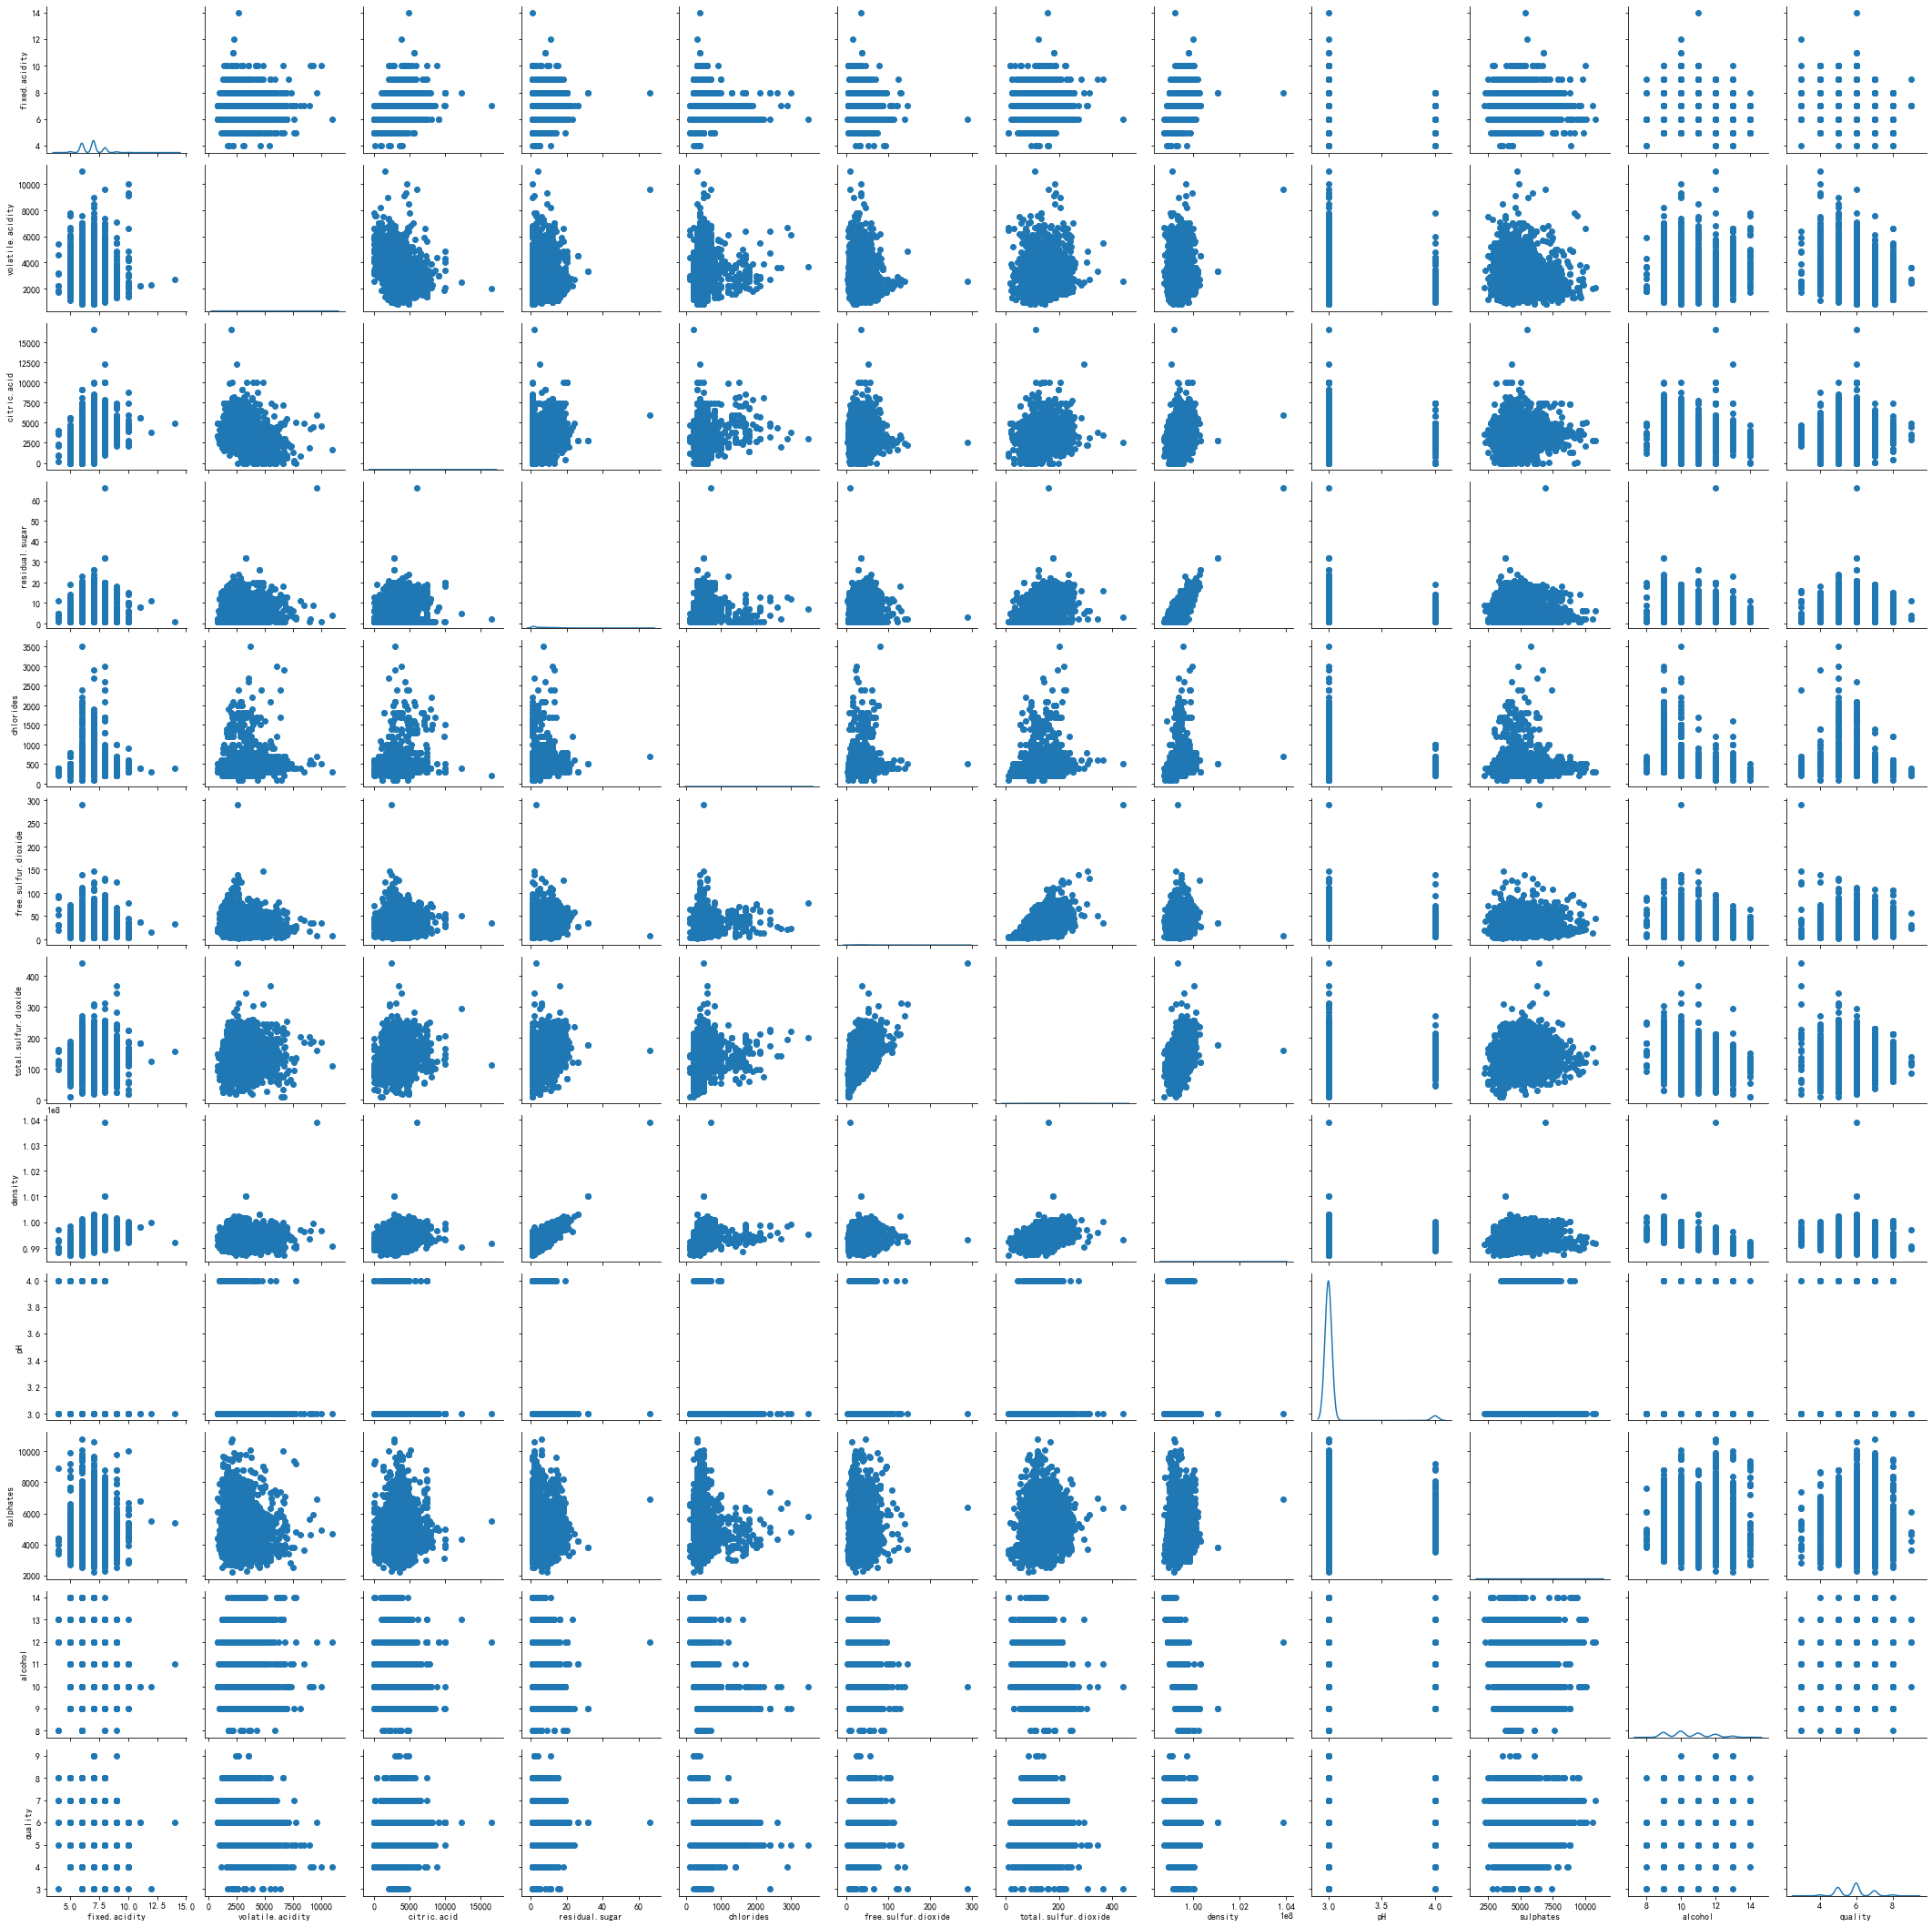

In [45]:
g = sns.PairGrid(df_w)
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter)

### **1.2.2WineQualityReds数据集的可视化分析**

WineQualityReds数据集热力图展示

可以看出质量一栏中，与质量正相关的几种属性分别为：酒精(alcohol)、硫酸盐(sulphates)、柠檬酸(citric.acid),与质量逆相关性的几种属性分别为：挥发性酸(volatile.acidity)、密度(density)、总二氧化硫量(total.sulfur.dioxide)

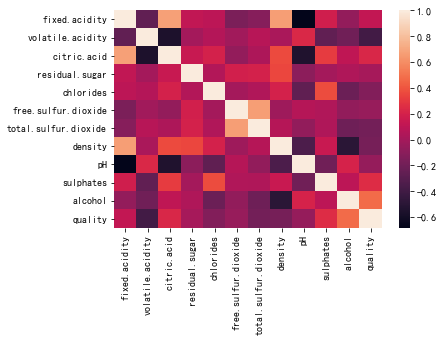

In [75]:
sns.heatmap(df_r.corr())

对每个属性的数值进行四舍五入的处理，方便后续的散点图制作，并规范化到相同的数值范围

In [57]:
df_w['fixed.acidity'] = np.round(df_w['fixed.acidity'])
df_w['alcohol'] = np.round(df_w['alcohol'])
df_w['sulphates'] = np.round(df_w['sulphates']*100)
df_w['pH'] = np.round(df_w['pH'])
df_w['residual.sugar'] = np.round(df_w['residual.sugar'])
df_w['volatile.acidity'] = np.round(df_w['volatile.acidity']*100)
df_w['citric.acid'] = np.round(df_w['citric.acid']*100)
df_w['chlorides'] = np.round(df_w['chlorides']*100)
df_w['density'] = np.round(df_w['density']*10000)

画出'citric acid'属性对应的质量分布，从图上可以看出，在quality=6时，点数较多，也就是说但从citric acid属性来看，quality=6的样品占大多数

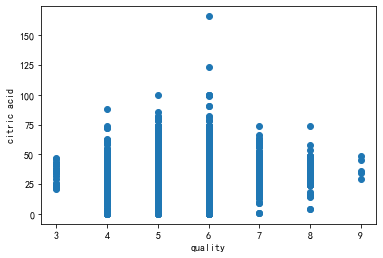

In [58]:
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.scatter(x=df_w['quality'],y=df_w['citric.acid'])

从散点图来看稍微有一些不太明朗，我们利用bar图可以直接看出分布的百分比模式

[0, 0, 0, 0.004083299305839118, 0.03327888934258881, 0.2974683544303797, 0.44875459371171905, 0.17966516945692118, 0.03572886892609228, 0.0010208248264597796, 0]


Text(0, 0.5, "'citric acid'属性对应的质量分布")

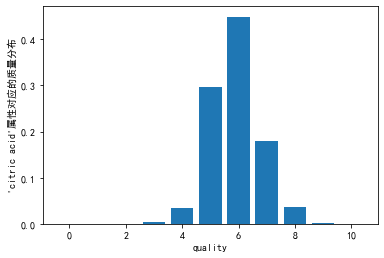

In [59]:

res=df_w['quality'].value_counts(normalize=True)
num_list=[]
for i in range(0,11):
    if(i in res.index):
        num_list.append(res[i])
    else:
        num_list.append(0)
print(num_list)
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）
plt.bar(range(0,11),num_list)
plt.xlabel('quality')
plt.ylabel('\'citric acid\'属性对应的质量分布')

对其他的属性也可以进行上述的图形化展示，比如'fixed.acidity'属性

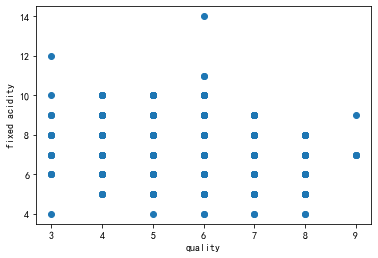

In [60]:
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.scatter(x=df_w['quality'],y=df_w['fixed.acidity'])

x坐标是质量指标【0-10】，y坐标是pH值，size大小根据free.sulfur.dioxide（游离态的SO2）属性值来区分,从下图中可以看出，pH值都在3~4左右，质量越高，二氧化硫的浓度越低

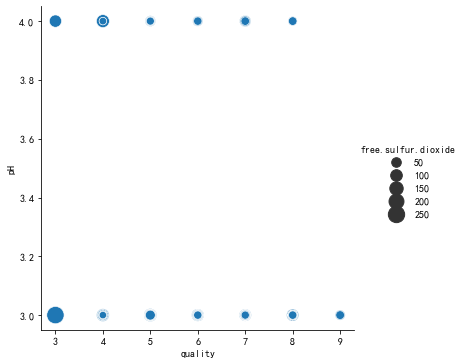

In [62]:
sns.relplot(x="quality", y="pH", size="free.sulfur.dioxide", sizes=(50,300), data=df_w)

同样的方式画出'free.sulfur.dioxide'与属性quality之间的分布关系

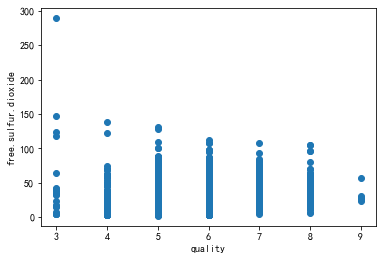

In [63]:
plt.xlabel('quality')
plt.ylabel('free.sulfur.dioxide')
plt.scatter(x=df_w['quality'],y=df_w['free.sulfur.dioxide'])

x坐标是质量指标【0-10】，y坐标是alcohol值，size大小根据pH属性值来区分,从下图中可以看出，pH值四舍五入为4，5。

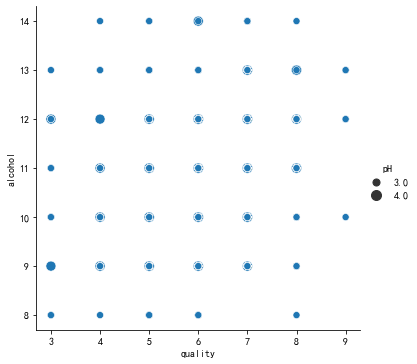

In [64]:
sns.relplot(x="quality", y="alcohol", size="pH", sizes=(50,100), data=df_w)

我们也可以使用盒形图来观察数据的分布情况,每个品质之下又根据pH的取值3或4来进行分类展示

可以看到每种质量下都有一些离群点，pH接近4时，fixed.acidity越小，酒品的质量一般越高。相同质量下，pH接近4的fixde.acidity普遍来说比pH接近3的fixed.acidity小。

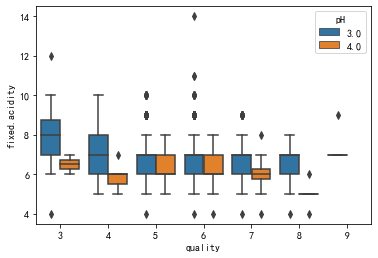

In [65]:
sns.boxplot(x='quality',y='fixed.acidity',data=df_w,hue='pH')

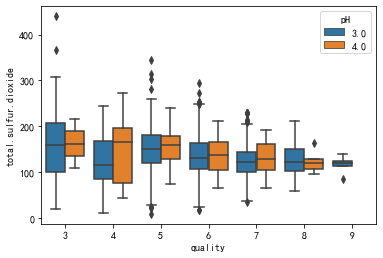

In [86]:
sns.boxplot(x="quality", y="total.sulfur.dioxide", hue="pH",data=df_w)

上图可以看出，除质量为4的质量外，相同质量下，pH为3或4的酒品total.sulfur.dioxide的中位数相差不大，而pH=3的total.sulfur.dioxide的最小值普遍比pH=4的total.sulfur.dioxide的最小值小；最大值也比pH=4的大。

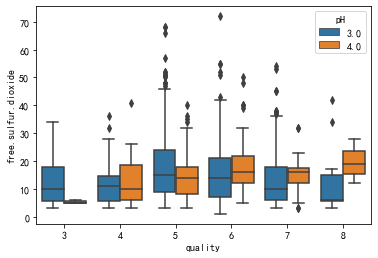

In [68]:
sns.boxplot(x="quality", y="free.sulfur.dioxide", hue="pH",data=df)

上图可以看出，酒品质量低时，pH=4的free.sulfur.dioxide的值一般低于pH=3的free.sulfur.dioxide的值；当酒品质量高时，pH=4的free.sulfur.dioxide的值一般高于pH=3的。

我们也可以使用小提琴图来观察数据的分布情况,每个品质之下又根据pH的取值3或4来进行分类展示

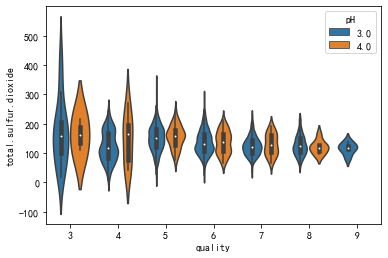

In [72]:
sns.violinplot(x="quality", y="total.sulfur.dioxide", hue="pH",data=df_w)

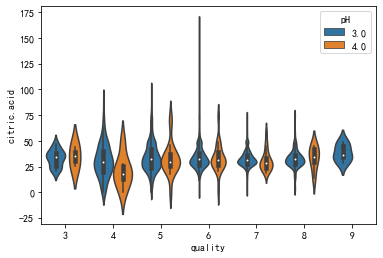

In [71]:
sns.violinplot(x="quality", y="citric.acid", hue="pH",data=df_w)

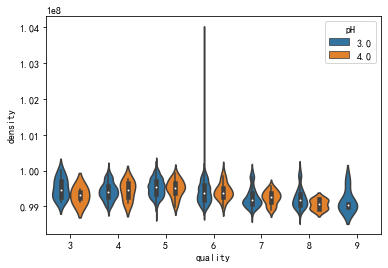

In [42]:
sns.violinplot(x="quality", y="density", hue="pH",data=df_w)

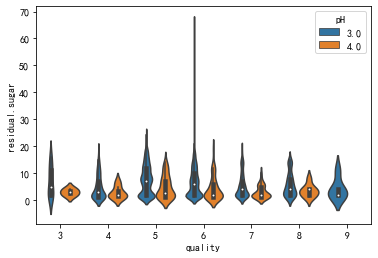

In [70]:
sns.violinplot(x="quality", y="residual.sugar", hue="pH",data=df_w)

统计各个质量下的样本综总数

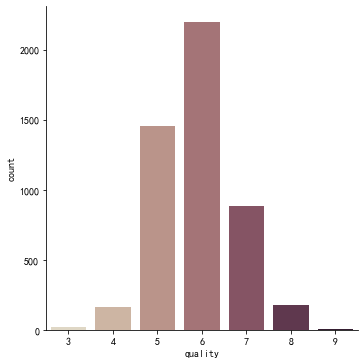

In [69]:
sns.catplot(x="quality", kind="count",palette="ch:.30",data=df_w)

在这里我们展示两两变量之间的关系图

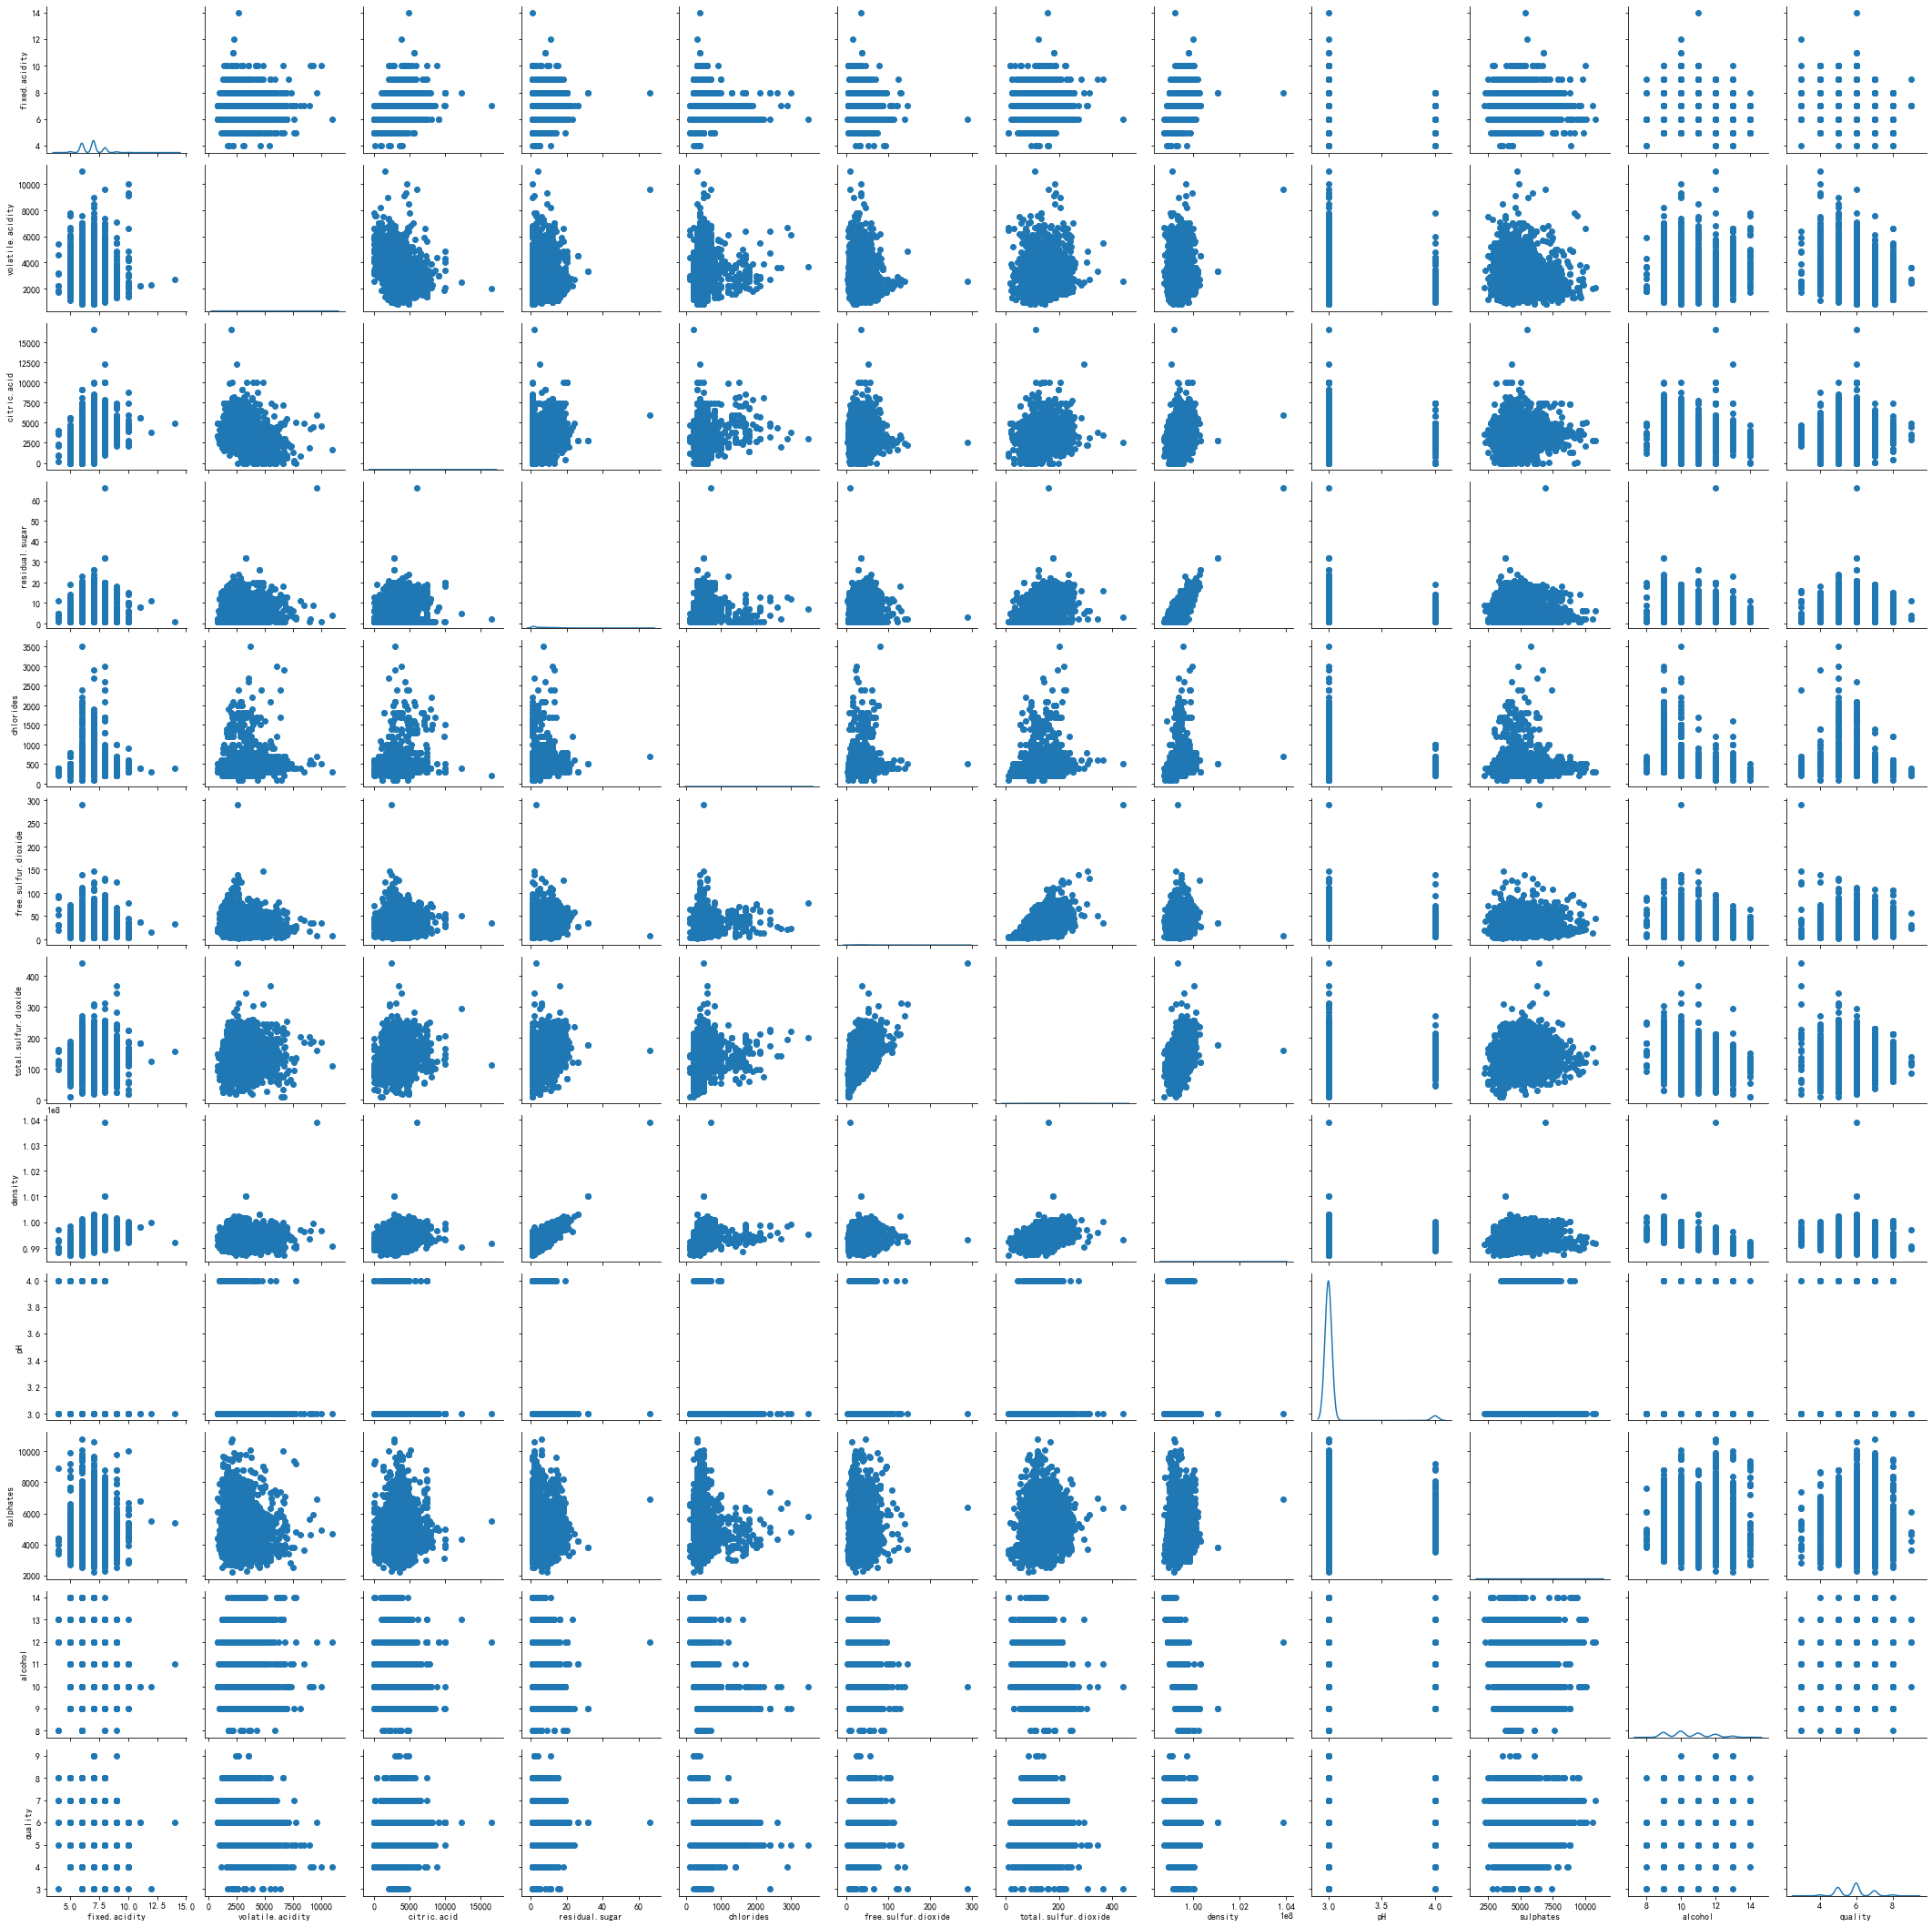

In [45]:
g = sns.PairGrid(df_w)
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter)

# 2 根据各个属性信息对葡萄酒的质量进行预测
## 2.1 基于wineQualityWhites数据集的质量预测

In [6]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

train_set,test_set = train_test_split(df_w,train_size = 0.2,test_size=0.8,shuffle=True)
X_train = train_set[['alcohol','density','total.sulfur.dioxide','chlorides','residual.sugar','volatile.acidity','fixed.acidity']]
Y_train = train_set['quality']
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import k_means
from sklearn.metrics import accuracy_score

In [32]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras.layers import Conv1D, MaxPool1D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.layers.core import Activation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [97]:
X_test= test_set[['alcohol','density','total.sulfur.dioxide','chlorides','residual.sugar','volatile.acidity','fixed.acidity']]
Y_test = test_set['quality']


回归算法是一种有监督学习算法，用来建立自变量X和观测变量Y之间的映射关系，如果观测变量是离散的，则称其为分类Classification；如果观测变量是连续的，则称其为回归Regression。  
使用线性回归模型对wineQualityWhites数据集进行训练，并在测试集上返回预测的准确率：51.14%  

In [48]:
clf = LinearRegression()
clf.fit(X_train,Y_train)
predicted_Y = clf.predict(X_test)
predicted = np.round(predicted_Y)
accuracy_score(predicted,Y_test)

0.511354937484052

LR模型可以被认为就是一个被Sigmoid函数（logistic方程）所归一化后的线性回归模型！逻辑回归(Logistic Regression, LR)模型其实仅在线性回归的基础上，套用了一个逻辑函数，但也就由于这个逻辑函数，使得逻辑回归模型成为了机器学习领域一颗耀眼的明星。    
使用逻辑回归模型对wineQualityWhites数据集进行训练，并在测试集上返回预测的准确率45.01%

In [49]:
clf = LogisticRegression()
clf.fit(X_train,Y_train)
predicted_Y = clf.predict(X_test)
predicted = np.round(predicted_Y)
accuracy_score(predicted,Y_test)

0.4501148252105129

SVM建立决策边界时，只关心距离决策边界最近的那两个样本点，然后取距离它们都最远的决策边g ，认为g就是最佳决策边界。支持向量机还有一个重要的优点是可以使用核函数(Kernel Function)隐式地将样本从原始特征空间映射到更高维的空间, 并解决原始特征空间中的线性不可分问题.支持向量机一个重要的优点是可以使用核函数(Kernel Function)隐式地将样本从原始特征空间映射到更高维的空间, 并解决原始特征空间中的线性不可分问题.  
使用线性核的支持向量机模型对wineQualityWhites数据集进行训练，并在测试集上返回预测的准确率51.16%

In [98]:
clf = SVC(kernel='linear')
clf.fit(X_train,Y_train)
predicted_Y = clf.predict(X_test)
predicted = np.round(predicted_Y)
accuracy_score(predicted,Y_test)

0.5116101046185252

决策树（Decision Tree）是一种基本的分类与回归方法，当决策树用于分类时称为分类树，用于回归时称为回归树。本文主要讨论决策树中的分类树与回归树的一些基本理论，后续文章会继续讨论决策树的Boosting和Bagging相关方法。
决策树由结点和有向边组成。结点有两种类型：内部结点和叶结点，其中内部结点表示一个特征或属性，叶结点表示一个类。一般的，一棵决策树包含一个根结点、若干个内部结点和若干个叶结点。叶结点对应于决策结果，其他每个结点则对应于一个属性测试。每个结点包含的样本集合根据属性测试的结果被划分到子结点中，根结点包含样本全集，从根结点到每个叶结点的路径对应了一个判定测试序列。  
使用决策树模型对wineQualityWhites数据集进行训练，并在测试集上返回预测的准确率47.84%

In [99]:
clf = DecisionTreeRegressor()
clf.fit(X_train,Y_train)
predicted_Y = clf.predict(X_test)
predicted = np.round(predicted_Y)
accuracy_score(predicted,Y_test)

0.47843837713702475

决策树+bagging=随机森林，随机森林是一种比较新的机器学习模型(非线性基于树的模型)集成学习方法。上世纪八十年代Breiman等人发明分类树算法，通过反复二分数据进行分类或回归，计算量大大降低，2001年Breiman把分类树组合成随机森林，即在变量(列)的使用和数据(行)的使用上进行随机化，生成很多分类树，再汇总分类树结果。随机森林在运算量没有显著提高前提下提高了预测精度，随机森林对多元共线性不敏感，结果对缺失数据和非平衡数据比较稳健，可以很好地预测多达几千个解释变量的作用，被誉为当前最好算法之一。  
随机森林是集群分类模型中的一种，随机森林是用随机的方式建立一个森林，森林由很多的决策树组成，且每一棵决策树之间是没有关联的。得到随机森林模型后，当新样本进入时随机森林中的每一棵决策树分别进行判断，bagging集合策略比较简单，对于分类问题通常使用投票法，得到最多票数类别或者类别之一为最终模型输出。对于回归通常使用简单平均法，T个弱学习器得到的回归结果进行算术平均即最终模型输出。  
使用随机森林回归模型对wineQualityWhites数据集进行训练，并在测试集上返回预测的准确率55.19%

In [100]:
clf = RandomForestRegressor()
clf.fit(X_train,Y_train)
predicted_Y = clf.predict(X_test)
predicted = np.round(predicted_Y)
accuracy_score(predicted,Y_test)

0.5519265118652718

高斯核函数是SVM中使用最多的一种核函数，对比高斯函数x-u,高斯核函数中表征的是两个向量(x,y)之间的关系，高斯函数又被称为RBF核和径向基核函数。在多项式核函数中，我们知道多项式核函数是将数据点添加多项式项，再将这些有了多项式项的特征点进行点乘，就形成了多项式核函数，对于高斯核函数也是一样，首先将原来的数据点映射成一种新的特征向量，然后得到新的特征向量点乘的结果，对高斯核函数来说，本质就是将每一个样本点映射到一个无穷维的特征空间，这就表明高斯核函数对于样本数据的变形是非常复杂的，但是经过变形，再去点乘，得到的结果却是非常简明的，就是核函数中的式子，这样也表明了核函数的威力。  
使用高斯核函数的支持向量机模型对wineQualityWhites数据集进行训练，并在测试集上返回预测的准确率50.98%

In [101]:
clf = SVC(kernel='rbf',gamma='auto')
clf.fit(X_train,Y_train)
predicted_Y = clf.predict(X_test)
predicted = np.round(predicted_Y)
accuracy_score(predicted,Y_test)

0.5098239346772135

In [8]:
features = ['fixed.acidity',
            'volatile.acidity',
            'citric.acid',
            'residual.sugar',
            'chlorides',
            'free.sulfur.dioxide',
            'total.sulfur.dioxide',
            'density',
            'pH',
            'sulphates',
            'alcohol']

target = ['quality']

In [9]:
# 白葡萄酒数据集
x_w = np.array(df_w[features])
y_w = np.array(df_w[target].values.ravel())
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(x_w, y_w, test_size=0.2, random_state=200)

In [10]:
def print_predict_vs_test_multi(clf,x_test,y_test):
    prediction = clf.predict(x_test)
    print('Predict values:')
    print(prediction[:10])
    print('-'*10)
    print('True values in test set:')
    print(y_test[:10])

In [11]:
def get_results_multi(clf,clf_name,x_train,y_train,x_test,y_test):
    y_pred = clf.predict(x_test)
    print('Training Accuracy('+clf_name+'): {:2.2%}'.format(accuracy_score(y_train, clf.predict(x_train))))    
    print('Test Accuracy('+clf_name+'): {:2.2%}\n'.format(accuracy_score(y_test, clf.predict(x_test))))
    print('Classification Report('+clf_name+'): \n' + classification_report(y_test, y_pred))
    
    probs = clf.predict_proba(x_test) # Predict class probabilities of the input samples 
    preds = probs[:,1]
    
    
    print('5 fold Cross Validation('+clf_name+'):')
    cv_accuracy = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
    print('Accuracy: {:2.2%}'.format(np.mean(cv_accuracy)))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot = True, fmt="d", linewidths=.5, square = True,cmap='Blues')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix ('+clf_name+')',fontsize=16)
    
    tmp = pd.DataFrame({'Feature': features, 'Feature Importance': clf.feature_importances_})
    tmp = tmp.sort_values(by='Feature Importance',ascending=False)
    plt.figure(figsize = (10,6))
    plt.title('Features Importance',fontsize=16)
    s = sns.barplot(x='Feature',y='Feature Importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

In [12]:
def get_results_multi_withoutFeatureImportance(clf,clf_name,x_train,y_train,x_test,y_test):
    y_pred = clf.predict(x_test)
    print('Training Accuracy('+clf_name+'): {:2.2%}'.format(accuracy_score(y_train, clf.predict(x_train))))    
    print('Test Accuracy('+clf_name+'): {:2.2%}\n'.format(accuracy_score(y_test, clf.predict(x_test))))
    print('Classification Report('+clf_name+'): \n' + classification_report(y_test, y_pred))
    
    probs = clf.predict_proba(x_test) # Predict class probabilities of the input samples 
    preds = probs[:,1]
    
    
    print('5 fold Cross Validation('+clf_name+'):')
    cv_accuracy = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
    print('Accuracy: {:2.2%}'.format(np.mean(cv_accuracy)))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot = True, fmt="d", linewidths=.5, square = True,cmap='Blues')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix ('+clf_name+')',fontsize=16)

之前我们使用的是决策树回归方法，即DecisionTreeRegressor()，接下来使用决策树分类方法，即DecisionTreeClassifier()，并且对一些参数做了调整，最后对wineQualityWhites数据集进行训练，并在测试集上返回预测的准确率54.39%，对比回归方法准确率有明显提升。

Predict values:
[5 6 6 6 5 6 6 6 5 6]
----------
True values in test set:
[5 6 7 6 5 6 6 7 6 5]
Training Accuracy(Decision Tree - Multiclass Classification): 56.20%
Test Accuracy(Decision Tree - Multiclass Classification): 54.39%

Classification Report(Decision Tree - Multiclass Classification): 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.14      0.03      0.05        36
           5       0.51      0.65      0.57       260
           6       0.57      0.68      0.62       480
           7       0.52      0.23      0.32       168
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00         1

    accuracy                           0.54       980
   macro avg       0.25      0.23      0.22       980
weighted avg       0.51      0.54      0.51       980

5 fold Cross Validation(Decision Tree - Multiclass Classification):
Accuracy: 52.45%


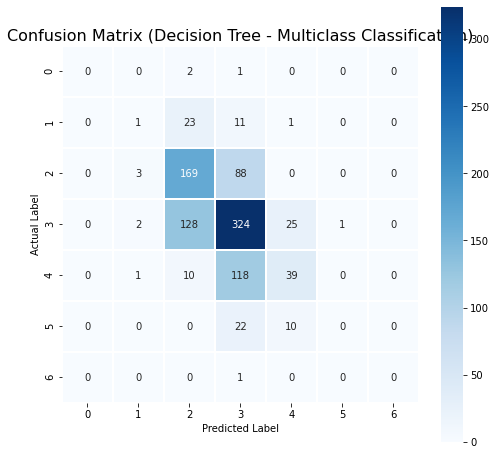

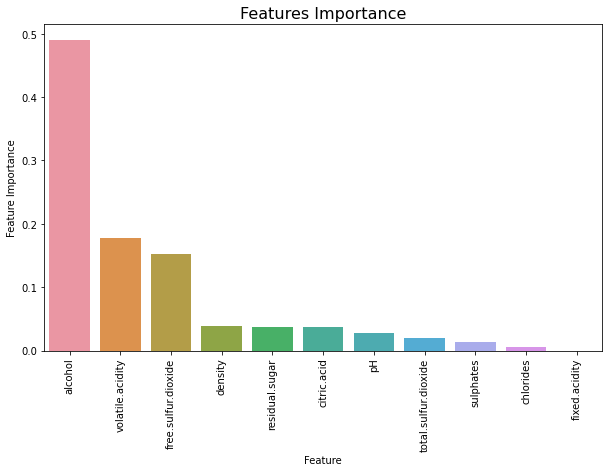

In [13]:
dt_clf = DecisionTreeClassifier(random_state = 42, 
                             criterion = 'entropy',
                             max_depth = 5,
                             min_samples_leaf = 2,                                                   
                            )
dt_clf.fit(x_train_w, y_train_w)
print_predict_vs_test_multi(dt_clf, x_test_w, y_test_w)
get_results_multi(dt_clf, 'Decision Tree - Multiclass Classification', x_train_w, y_train_w, x_test_w, y_test_w)

同理，接下来使用随机森林分类方法，即RandomForestClassifier()，并且对一些参数做了调整，最后对wineQualityWhites数据集进行训练，并在测试集上返回预测的准确率56.84%。

Predict values:
[5 6 6 6 5 6 6 6 5 5]
----------
True values in test set:
[5 6 7 6 5 6 6 7 6 5]
Training Accuracy(Random Forest - Multiclass Classification): 61.43%
Test Accuracy(Random Forest - Multiclass Classification): 56.84%

Classification Report(Random Forest - Multiclass Classification): 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        36
           5       0.54      0.62      0.58       260
           6       0.58      0.74      0.65       480
           7       0.58      0.24      0.34       168
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00         1

    accuracy                           0.57       980
   macro avg       0.24      0.23      0.22       980
weighted avg       0.53      0.57      0.53       980

5 fold Cross Validation(Random Forest - Multiclass Classification):
Accuracy: 56.10%


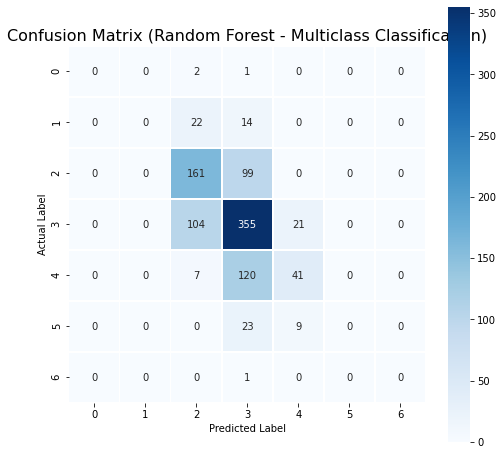

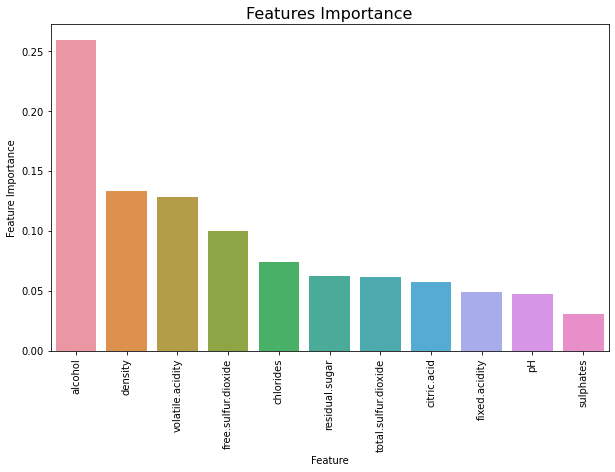

In [14]:
rf_clf = RandomForestClassifier(random_state = 42,
                                criterion = 'entropy', 
                                max_depth=6,
                                min_samples_leaf = 2,
                                n_estimators = 150)
rf_clf.fit(x_train_w, y_train_w)
print_predict_vs_test_multi(rf_clf, x_test_w, y_test_w)
get_results_multi(rf_clf, 'Random Forest - Multiclass Classification', x_train_w, y_train_w, x_test_w, y_test_w)

使用SVM模型对wineQualityWhites数据集进行训练，并在测试集上返回预测的准确率49.39%

Predict values:
[6 6 6 6 6 6 6 6 6 6]
----------
True values in test set:
[5 6 7 6 5 6 6 7 6 5]
Training Accuracy(SVM - Multiclass Classification): 44.59%
Test Accuracy(SVM - Multiclass Classification): 49.39%

Classification Report(SVM - Multiclass Classification): 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        36
           5       0.44      0.18      0.26       260
           6       0.50      0.91      0.65       480
           7       0.00      0.00      0.00       168
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00         1

    accuracy                           0.49       980
   macro avg       0.13      0.16      0.13       980
weighted avg       0.36      0.49      0.38       980

5 fold Cross Validation(SVM - Multiclass Classification):
Accuracy: 44.23%


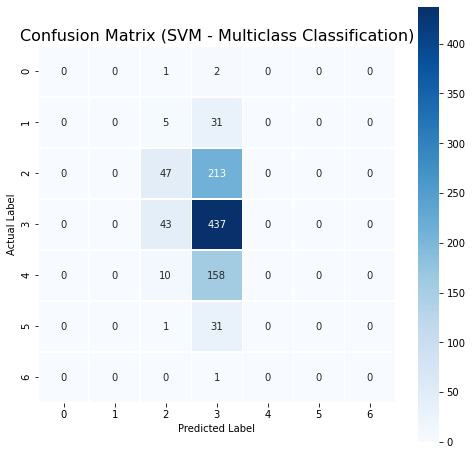

In [15]:
svm_clf = svm.SVC(random_state = 42, gamma='scale', probability=True)
svm_clf.fit(x_train_w, y_train_w)
print_predict_vs_test_multi(svm_clf, x_test_w, y_test_w)
get_results_multi_withoutFeatureImportance(svm_clf, 'SVM - Multiclass Classification', x_train_w, y_train_w, x_test_w, y_test_w)

&emsp;&emsp;邻近算法，或者说K最近邻（KNN，K-NearestNeighbor）分类算法是数据挖掘分类技术中最简单的方法之一。所谓K最近邻，就是K个最近的邻居的意思，说的是每个样本都可以用它最接近的K个邻近值来代表。近邻算法就是将数据集合中每一个记录进行分类的方法。该方法的思路非常简单直观：如果一个样本在特征空间中的K个最相似（即特征空间中最邻近）的样本中的大多数属于某一个类别，则该样本也属于这个类别。该方法在定类决策上只依据最邻近的一个或者几个样本的类别来决定待分样本所属的类别。
<br/>
![avatar](https://bkimg.cdn.bcebos.com/pic/03087bf40ad162d95867202e15dfa9ec8a13cd73?x-bce-process=image/watermark,image_d2F0ZXIvYmFpa2U4MA==,g_7,xp_5,yp_5/format,f_auto)

使用KNN模型对wineQualityWhites数据集进行训练，并在测试集上返回预测的准确率46.43%

Predict values:
[5 6 6 5 6 5 6 7 6 7]
----------
True values in test set:
[5 6 7 6 5 6 6 7 6 5]
Training Accuracy(KNN - Multiclass Classification): 56.43%
Test Accuracy(KNN - Multiclass Classification): 46.43%

Classification Report(KNN - Multiclass Classification): 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.22      0.06      0.09        36
           5       0.40      0.51      0.45       260
           6       0.54      0.61      0.57       480
           7       0.26      0.14      0.18       168
           8       0.38      0.09      0.15        32
           9       0.00      0.00      0.00         1

    accuracy                           0.46       980
   macro avg       0.26      0.20      0.21       980
weighted avg       0.44      0.46      0.44       980

5 fold Cross Validation(KNN - Multiclass Classification):
Accuracy: 45.84%


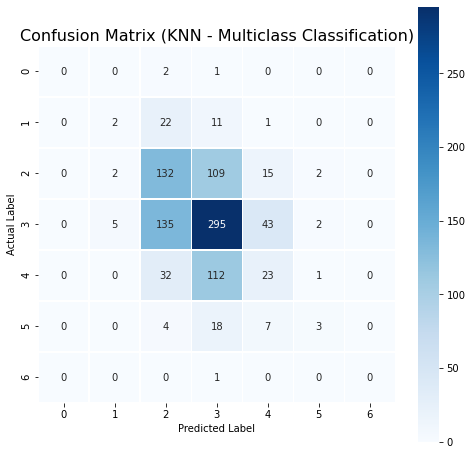

In [16]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(x_train_w, y_train_w)
print_predict_vs_test_multi(knn_clf, x_test_w, y_test_w)
get_results_multi_withoutFeatureImportance(knn_clf, 'KNN - Multiclass Classification', x_train_w, y_train_w, x_test_w, y_test_w)

&emsp;&emsp;以上使用了大量的机器学习方法进行葡萄酒质量的预测训练，接下来我们使用两个简单的深度学习模型，多层感知机（MLP）和卷积神经网络（CNN），进行葡萄酒质量预测的任务。
<br/>&emsp;&emsp;
   多层感知器(Multi-Layer Perceptron，MLP)也叫人工神经网络(Artificial Neural Network，ANN)，除了输入输出层，它中间可以有多个隐层。最简单的MLP需要有一层隐层，即输入层、隐层和输出层才能称为一个简单的神经网络。MLP是一种前馈人工神经网络模型，其将输入的多个数据集映射到单一的输出的数据集上。MLP模型图如下所示：
<br/>
![avatar](https://mp.ofweek.com/Upload/News/Img/member20047/201905/wx_article_20190526215521_x5e048.jpg)
<br/>&emsp;&emsp;
   卷积神经网络（Convolutional Neural Networks, CNN）是一类包含卷积计算且具有深度结构的前馈神经网络（Feedforward Neural Networks），是深度学习（deep learning）的代表算法之一。卷积神经网络具有表征学习（representation learning）能力，能够按其阶层结构对输入信息进行平移不变分类（shift-invariant classification），因此也被称为“平移不变人工神经网络（Shift-Invariant Artificial Neural Networks, SIANN）”。
<br/>&emsp;&emsp;
   卷积神经网络通常包含以下几种层：
<br/>&emsp;&emsp;
   卷积层（Convolutional layer），卷积神经网路中每层卷积层由若干卷积单元组成，每个卷积单元的参数都是通过反向传播算法优化得到的。卷积运算的目的是提取输入的不同特征，第一层卷积层可能只能提取一些低级的特征如边缘、线条和角等层级，更多层的网络能从低级特征中迭代提取更复杂的特征。
<br/>&emsp;&emsp;
   线性整流层（Rectified Linear Units layer, ReLU layer），这一层神经的活性化函数（Activation function）使用线性整流（Rectified Linear Units, ReLU）。
<br/>&emsp;&emsp;
   池化层（Pooling layer），通常在卷积层之后会得到维度很大的特征，将特征切成几个区域，取其最大值或平均值，得到新的、维度较小的特征。
<br/>&emsp;&emsp;
   全连接层（ Fully-Connected layer）, 把所有局部特征结合变成全局特征，用来计算最后每一类的得分。
<br/>&emsp;&emsp;
   CNN的模型图如下图所示：
<br/>
   ![avatar](https://www.sumaarts.com/media/file/20180312/x1520823507479910.jpg.pagespeed.ic.gJEf-zqHYq.webp)

使用MLP模型对wineQualityWhites数据集进行训练，并在测试集上返回预测的准确率51.94%

In [17]:
# MLP
input = keras.layers.Input(shape=(11,))
x = keras.layers.Dense(64, activation='relu')(input)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=input, outputs=predictions)

In [18]:
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_w, y_train_w, epochs=100, batch_size=32, validation_split=0.2)
score = model.evaluate(x_test_w, y_test_w)
print('MLP test accuracy:', score[1])




Train on 3134 samples, validate on 784 samples
Epoch 1/100
3134/3134 [==============================] - 0s 63us/step - loss: 10.1500 - accuracy: 0.2967 - val_loss: 2.4970 - val_accuracy: 0.3355
Epoch 2/100
3134/3134 [==============================] - 0s 29us/step - loss: 3.0186 - accuracy: 0.3124 - val_loss: 1.5458 - val_accuracy: 0.4209
Epoch 3/100
3134/3134 [==============================] - 0s 29us/step - loss: 1.7601 - accuracy: 0.3526 - val_loss: 1.4493 - val_accuracy: 0.4298
Epoch 4/100
3134/3134 [==============================] - 0s 30us/step - loss: 1.5034 - accuracy: 0.3797 - val_loss: 1.4206 - val_accuracy: 0.4273
Epoch 5/100
3134/3134 [==============================] - 0s 30us/step - loss: 1.4300 - accuracy: 0.4014 - val_loss: 1.3960 - val_accuracy: 0.4273
Epoch 6/100
3134/3134 [==============================] - 0s 30us/step - loss: 1.3936 - accuracy: 0.4205 - val_loss: 1.3969 - val_accuracy: 0.4298
Epoch 7/100
3134/3134 [==============================] - 0s 31us/step - l

使用CNN模型对wineQualityWhites数据集进行训练，并在测试集上返回预测的准确率50.92%

In [19]:
# 训练CNN模型前的白葡萄酒数据处理
x_train_w_cnn = x_train_w.reshape(-1, 11, 1)
x_test_w_cnn = x_test_w.reshape(-1, 11, 1)
y_train_w_cnn = keras.utils.to_categorical(y_train_w) # label做一个one-hot encoding处理
y_test_w_cnn = keras.utils.to_categorical(y_test_w)

In [20]:
# CNN
lenet = Sequential()
# 表示我们的网络将学习6个滤波器 每个滤波器的大小都是3×3，步长为1
lenet.add(Conv1D(6, kernel_size=3, strides=1, padding='same', input_shape=(11, 1)))
lenet.add(Activation("relu"))
# 2×2的最大池化层 步长为2
lenet.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
lenet.add(Activation("relu"))
# 表示我们的网络将学习16个滤波器 每个滤波器的大小都是5×5，步长为1
lenet.add(Conv1D(16, kernel_size=5, strides=1, padding='same'))
# 2×2的最大池化层 步长为2
lenet.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
# 展开
lenet.add(Flatten())
# 接下来相当于有两层full-connected网络
# 120个神经元 全连接网络
lenet.add(Dense(64))
lenet.add(Activation("relu"))
lenet.add(Dropout(0.25))
# 84个神经元 全连接网络
lenet.add(Dense(32))
lenet.add(Activation("relu"))
lenet.add(Dense(10, activation='softmax')) # 10个类别的softmax分类器

In [21]:
lenet.compile('Adam', loss='categorical_crossentropy', metrics=['accuracy'])
lenet.fit(x_train_w_cnn, y_train_w_cnn, batch_size=32, epochs=100, validation_split=0.2) # 即训练集再拿出0.2作为验证集
score = lenet.evaluate(x_test_w_cnn, y_test_w_cnn)
print('test accuracy:', score[1])

Train on 3134 samples, validate on 784 samples
Epoch 1/100
3134/3134 [==============================] - 0s 101us/step - loss: 2.5440 - accuracy: 0.3472 - val_loss: 1.4145 - val_accuracy: 0.3278
Epoch 2/100
3134/3134 [==============================] - 0s 46us/step - loss: 1.3983 - accuracy: 0.3979 - val_loss: 1.4250 - val_accuracy: 0.3138
Epoch 3/100
3134/3134 [==============================] - 0s 44us/step - loss: 1.3450 - accuracy: 0.4097 - val_loss: 1.3639 - val_accuracy: 0.3112
Epoch 4/100
3134/3134 [==============================] - 0s 45us/step - loss: 1.3075 - accuracy: 0.4244 - val_loss: 1.3338 - val_accuracy: 0.4490
Epoch 5/100
3134/3134 [==============================] - 0s 43us/step - loss: 1.2997 - accuracy: 0.4279 - val_loss: 1.3392 - val_accuracy: 0.4375
Epoch 6/100
3134/3134 [==============================] - 0s 45us/step - loss: 1.2886 - accuracy: 0.4285 - val_loss: 1.3452 - val_accuracy: 0.4541
Epoch 7/100
3134/3134 [==============================] - 0s 46us/step - loss

## 2.2 基于wineQualityReds数据集的质量预测

In [109]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(df_r,train_size = 0.2,test_size=0.8,shuffle=True)
X_train = train_set[['alcohol','density','total.sulfur.dioxide','chlorides','residual.sugar','volatile.acidity','fixed.acidity']]
Y_train = train_set['quality']
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import k_means
from sklearn.metrics import accuracy_score

In [110]:
X_test= test_set[['alcohol','density','total.sulfur.dioxide','chlorides','residual.sugar','volatile.acidity','fixed.acidity']]
Y_test = test_set['quality']

回归算法是一种有监督学习算法，用来建立自变量X和观测变量Y之间的映射关系，如果观测变量是离散的，则称其为分类Classification；如果观测变量是连续的，则称其为回归Regression。
使用线性回归模型对wineQualityReds数据集进行训练，并在测试集上返回预测的准确率：59.69%

In [111]:
clf = LinearRegression()
clf.fit(X_train,Y_train)
predicted_Y = clf.predict(X_test)
predicted = np.round(predicted_Y)
accuracy_score(predicted,Y_test)

0.596875

LR模型可以被认为就是一个被Sigmoid函数（logistic方程）所归一化后的线性回归模型！逻辑回归(Logistic Regression, LR)模型其实仅在线性回归的基础上，套用了一个逻辑函数，但也就由于这个逻辑函数，使得逻辑回归模型成为了机器学习领域一颗耀眼的明星。
使用逻辑回归模型对wineQualityReds数据集进行训练，并在测试集上返回预测的准确率: 51.64%

In [112]:
clf = LogisticRegression()
clf.fit(X_train,Y_train)
predicted_Y = clf.predict(X_test)
predicted = np.round(predicted_Y)
accuracy_score(predicted,Y_test)

0.51640625

SVM建立决策边界时，只关心距离决策边界最近的那两个样本点，然后取距离它们都最远的决策边g ，认为g就是最佳决策边界。支持向量机还有一个重要的优点是可以使用核函数(Kernel Function)隐式地将样本从原始特征空间映射到更高维的空间, 并解决原始特征空间中的线性不可分问题.支持向量机一个重要的优点是可以使用核函数(Kernel Function)隐式地将样本从原始特征空间映射到更高维的空间, 并解决原始特征空间中的线性不可分问题.
使用线性核的支持向量机模型对wineQualityReds数据集进行训练，并在测试集上返回预测的准确率56.17%

In [114]:
clf = SVC(kernel='linear')
clf.fit(X_train,Y_train)
predicted_Y = clf.predict(X_test)
predicted = np.round(predicted_Y)
accuracy_score(predicted,Y_test)

0.56171875

决策树（Decision Tree）是一种基本的分类与回归方法，当决策树用于分类时称为分类树，用于回归时称为回归树。本文主要讨论决策树中的分类树与回归树的一些基本理论，后续文章会继续讨论决策树的Boosting和Bagging相关方法。 决策树由结点和有向边组成。结点有两种类型：内部结点和叶结点，其中内部结点表示一个特征或属性，叶结点表示一个类。一般的，一棵决策树包含一个根结点、若干个内部结点和若干个叶结点。叶结点对应于决策结果，其他每个结点则对应于一个属性测试。每个结点包含的样本集合根据属性测试的结果被划分到子结点中，根结点包含样本全集，从根结点到每个叶结点的路径对应了一个判定测试序列。
使用决策树模型对wineQualityReds数据集进行训练，并在测试集上返回预测的准确率50.70%

In [115]:
clf = DecisionTreeRegressor()
clf.fit(X_train,Y_train)
predicted_Y = clf.predict(X_test)
predicted = np.round(predicted_Y)
accuracy_score(predicted,Y_test)

0.50703125

决策树+bagging=随机森林，随机森林是一种比较新的机器学习模型(非线性基于树的模型)集成学习方法。上世纪八十年代Breiman等人发明分类树算法，通过反复二分数据进行分类或回归，计算量大大降低，2001年Breiman把分类树组合成随机森林，即在变量(列)的使用和数据(行)的使用上进行随机化，生成很多分类树，再汇总分类树结果。随机森林在运算量没有显著提高前提下提高了预测精度，随机森林对多元共线性不敏感，结果对缺失数据和非平衡数据比较稳健，可以很好地预测多达几千个解释变量的作用，被誉为当前最好算法之一。随机森林是集群分类模型中的一种，随机森林是用随机的方式建立一个森林，森林由很多的决策树组成，且每一棵决策树之间是没有关联的。得到随机森林模型后，当新样本进入时随机森林中的每一棵决策树分别进行判断，bagging集合策略比较简单，对于分类问题通常使用投票法，得到最多票数类别或者类别之一为最终模型输出。对于回归通常使用简单平均法，T个弱学习器得到的回归结果进行算术平均即最终模型输出。  
使用随机森林回归模型对wineQualityReds数据集进行训练，并在测试集上返回预测的准确率57.50%

In [116]:
clf = RandomForestRegressor()
clf.fit(X_train,Y_train)
predicted_Y = clf.predict(X_test)
predicted = np.round(predicted_Y)
accuracy_score(predicted,Y_test)

0.575

高斯核函数是SVM中使用最多的一种核函数，对比高斯函数x-u,高斯核函数中表征的是两个向量(x,y)之间的关系，高斯函数又被称为RBF核和径向基核函数。在多项式核函数中，我们知道多项式核函数是将数据点添加多项式项，再将这些有了多项式项的特征点进行点乘，就形成了多项式核函数，对于高斯核函数也是一样，首先将原来的数据点映射成一种新的特征向量，然后得到新的特征向量点乘的结果，对高斯核函数来说，本质就是将每一个样本点映射到一个无穷维的特征空间，这就表明高斯核函数对于样本数据的变形是非常复杂的，但是经过变形，再去点乘，得到的结果却是非常简明的，就是核函数中的式子，这样也表明了核函数的威力。  
使用高斯核函数的支持向量机模型对wineQualityReds数据集进行训练，并在测试集上返回预测的准确率44.45%

In [119]:
clf = SVC(kernel='rbf',gamma='auto')
clf.fit(X_train,Y_train)
predicted_Y = clf.predict(X_test)
predicted = np.round(predicted_Y)
accuracy_score(predicted,Y_test)

0.44453125

In [22]:
# 红葡萄酒数据集
x_r = np.array(df_r[features])
y_r = np.array(df_r[target].values.ravel())
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x_r, y_r, test_size=0.2, random_state=200)

同样，我们在红葡萄酒数据集上也使用了决策树分类方法DecisionTreeClassifier()进行训练，经过调参在测试集上返回预测的准确率57.19%，对比DecisionTreeRegressor()的准率有明显提升。

Predict values:
[6 6 5 6 6 5 5 5 5 5]
----------
True values in test set:
[7 6 6 5 6 5 6 6 5 5]
Training Accuracy(Decision Tree - Multiclass Classification): 64.11%
Test Accuracy(Decision Tree - Multiclass Classification): 57.19%

Classification Report(Decision Tree - Multiclass Classification): 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.72      0.67       146
           6       0.54      0.51      0.52       128
           7       0.46      0.38      0.42        34
           8       0.00      0.00      0.00         1

    accuracy                           0.57       320
   macro avg       0.27      0.27      0.27       320
weighted avg       0.55      0.57      0.56       320

5 fold Cross Validation(Decision Tree - Multiclass Classification):
Accuracy: 53.79%


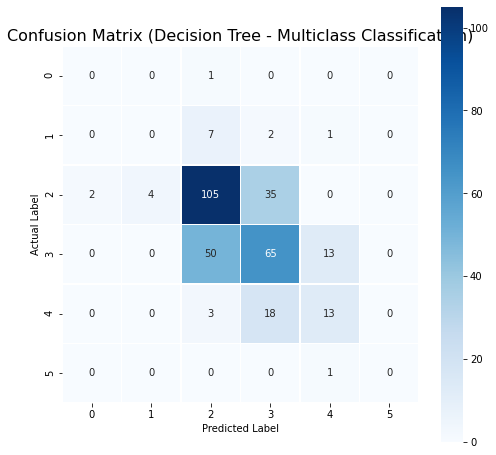

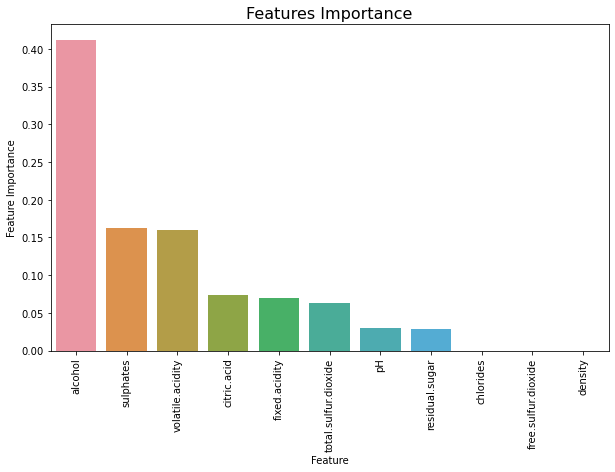

In [23]:
dt_clf = DecisionTreeClassifier(random_state = 42, 
                             criterion = 'entropy',
                             max_depth = 5,
                             min_samples_leaf = 2,                                                   
                            )
dt_clf.fit(x_train_r, y_train_r)
print_predict_vs_test_multi(dt_clf, x_test_r, y_test_r)
get_results_multi(dt_clf, 'Decision Tree - Multiclass Classification', x_train_r, y_train_r, x_test_r, y_test_r)

同理，使用随机森林模型的分类方法对wineQualityReds数据集进行训练，经过调参，在测试集上返回预测的准确率为68.12%，对比随机森林模型的回归方法准确率有明显提升。

Predict values:
[6 6 5 5 6 5 6 5 5 5]
----------
True values in test set:
[7 6 6 5 6 5 6 6 5 5]
Training Accuracy(Random Forest - Multiclass Classification): 74.28%
Test Accuracy(Random Forest - Multiclass Classification): 68.12%

Classification Report(Random Forest - Multiclass Classification): 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.74      0.82      0.78       146
           6       0.62      0.70      0.65       128
           7       0.62      0.29      0.40        34
           8       0.00      0.00      0.00         1

    accuracy                           0.68       320
   macro avg       0.33      0.30      0.31       320
weighted avg       0.65      0.68      0.66       320

5 fold Cross Validation(Random Forest - Multiclass Classification):
Accuracy: 59.81%


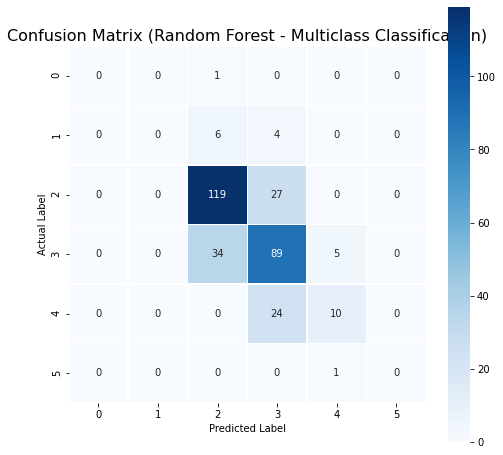

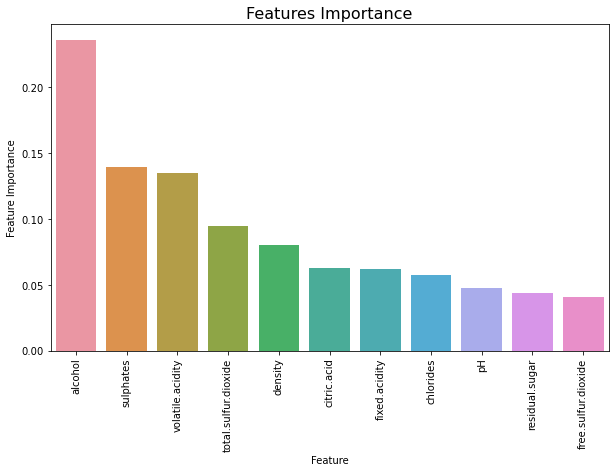

In [24]:
rf_clf = RandomForestClassifier(random_state = 42,
                                criterion = 'entropy', 
                                max_depth=6,
                                min_samples_leaf = 2,
                                n_estimators = 150)
rf_clf.fit(x_train_r, y_train_r)
print_predict_vs_test_multi(rf_clf, x_test_r, y_test_r)
get_results_multi(rf_clf, 'Random Forest - Multiclass Classification', x_train_r, y_train_r, x_test_r, y_test_r)

使用SVM模型对wineQualityReds数据集进行训练，并在测试集上返回预测的准确率55.00%

Predict values:
[6 6 6 6 6 5 6 6 6 6]
----------
True values in test set:
[7 6 6 5 6 5 6 6 5 5]
Training Accuracy(SVM - Multiclass Classification): 49.41%
Test Accuracy(SVM - Multiclass Classification): 55.00%

Classification Report(SVM - Multiclass Classification): 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.76      0.45      0.56       146
           6       0.47      0.86      0.61       128
           7       1.00      0.03      0.06        34
           8       0.00      0.00      0.00         1

    accuracy                           0.55       320
   macro avg       0.37      0.22      0.20       320
weighted avg       0.64      0.55      0.51       320

5 fold Cross Validation(SVM - Multiclass Classification):
Accuracy: 48.71%


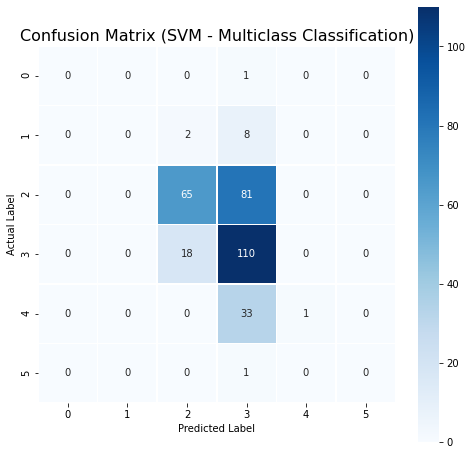

In [25]:
svm_clf = svm.SVC(random_state = 42, gamma='scale', probability=True)
svm_clf.fit(x_train_r, y_train_r)
print_predict_vs_test_multi(svm_clf, x_test_r, y_test_r)
get_results_multi_withoutFeatureImportance(svm_clf, 'SVM - Multiclass Classification', x_train_r, y_train_r, x_test_r, y_test_r)

使用KNN模型对wineQualityReds数据集进行训练，并在测试集上返回预测的准确率52.81%

Predict values:
[6 6 5 5 6 5 5 6 6 5]
----------
True values in test set:
[7 6 6 5 6 5 6 6 5 5]
Training Accuracy(KNN - Multiclass Classification): 58.01%
Test Accuracy(KNN - Multiclass Classification): 52.81%

Classification Report(KNN - Multiclass Classification): 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.56      0.69      0.62       146
           6       0.50      0.47      0.48       128
           7       0.42      0.24      0.30        34
           8       0.00      0.00      0.00         1

    accuracy                           0.53       320
   macro avg       0.25      0.23      0.23       320
weighted avg       0.50      0.53      0.51       320

5 fold Cross Validation(KNN - Multiclass Classification):
Accuracy: 50.27%


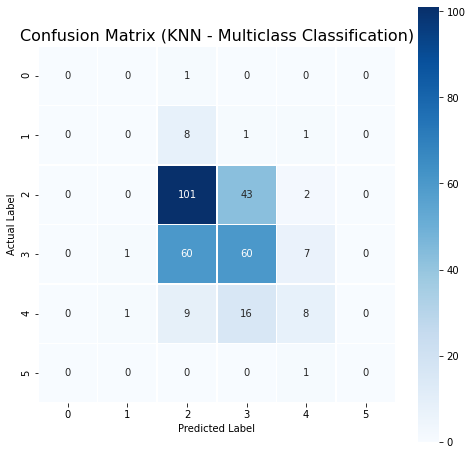

In [26]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(x_train_r, y_train_r)
print_predict_vs_test_multi(knn_clf, x_test_r, y_test_r)
get_results_multi_withoutFeatureImportance(knn_clf, 'KNN - Multiclass Classification', x_train_r, y_train_r, x_test_r, y_test_r)

使用MLP模型对wineQualityReds数据集进行训练，并在测试集上返回预测的准确率为63.75%

In [27]:
# MLP
input = keras.layers.Input(shape=(11,))
x = keras.layers.Dense(64, activation='relu')(input)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=input, outputs=predictions)

In [28]:
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_r, y_train_r, epochs=100, batch_size=32, validation_split=0.2)
score = model.evaluate(x_test_r, y_test_r)
print('MLP test accuracy:', score[1])

Train on 1023 samples, validate on 256 samples
Epoch 1/100
1023/1023 [==============================] - 0s 134us/step - loss: 4.3477 - accuracy: 0.3265 - val_loss: 1.7200 - val_accuracy: 0.4375
Epoch 2/100
1023/1023 [==============================] - 0s 31us/step - loss: 2.3962 - accuracy: 0.4135 - val_loss: 1.2410 - val_accuracy: 0.4688
Epoch 3/100
1023/1023 [==============================] - 0s 37us/step - loss: 1.8660 - accuracy: 0.4272 - val_loss: 1.1624 - val_accuracy: 0.4727
Epoch 4/100
1023/1023 [==============================] - 0s 36us/step - loss: 1.6488 - accuracy: 0.4291 - val_loss: 1.1361 - val_accuracy: 0.4648
Epoch 5/100
1023/1023 [==============================] - 0s 34us/step - loss: 1.5967 - accuracy: 0.4194 - val_loss: 1.1338 - val_accuracy: 0.4609
Epoch 6/100
1023/1023 [==============================] - 0s 34us/step - loss: 1.4508 - accuracy: 0.4409 - val_loss: 1.1410 - val_accuracy: 0.4258
Epoch 7/100
1023/1023 [==============================] - 0s 38us/step - loss

使用CNN模型对wineQualityReds数据集进行训练，并在测试集上返回预测的准确率为56.56%

In [29]:
# 训练CNN模型前的红葡萄酒数据处理
x_train_r_cnn = x_train_r.reshape(-1, 11, 1)
x_test_r_cnn = x_test_r.reshape(-1, 11, 1)
y_train_r_cnn = keras.utils.to_categorical(y_train_r) # label做一个one-hot encoding处理
y_test_r_cnn = keras.utils.to_categorical(y_test_r)

In [30]:
# CNN
lenet = Sequential()
# 表示我们的网络将学习6个滤波器 每个滤波器的大小都是3×3，步长为1
lenet.add(Conv1D(6, kernel_size=3, strides=1, padding='same', input_shape=(11, 1)))
lenet.add(Activation("relu"))
# 2×2的最大池化层 步长为2
lenet.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
lenet.add(Activation("relu"))
# 表示我们的网络将学习16个滤波器 每个滤波器的大小都是5×5，步长为1
lenet.add(Conv1D(16, kernel_size=5, strides=1, padding='same'))
# 2×2的最大池化层 步长为2
lenet.add(MaxPool1D(pool_size=2, strides=2, padding='same'))
# 展开
lenet.add(Flatten())
# 接下来相当于有两层full-connected网络
# 120个神经元 全连接网络
lenet.add(Dense(64))
lenet.add(Activation("relu"))
lenet.add(Dropout(0.25))
# 84个神经元 全连接网络
lenet.add(Dense(32))
lenet.add(Activation("relu"))
lenet.add(Dense(9, activation='softmax')) # 10个类别的softmax分类器

In [31]:
lenet.compile('Adam', loss='categorical_crossentropy', metrics=['accuracy'])
lenet.fit(x_train_r_cnn, y_train_r_cnn, batch_size=32, epochs=100, validation_split=0.2) # 即训练集再拿出0.2作为验证集

score = lenet.evaluate(x_test_r_cnn, y_test_r_cnn)
print('test accuracy:', score[1])

Train on 1023 samples, validate on 256 samples
Epoch 1/100
1023/1023 [==============================] - 0s 239us/step - loss: 2.6147 - accuracy: 0.3187 - val_loss: 1.2533 - val_accuracy: 0.3633
Epoch 2/100
1023/1023 [==============================] - 0s 51us/step - loss: 1.3844 - accuracy: 0.4311 - val_loss: 1.1631 - val_accuracy: 0.4219
Epoch 3/100
1023/1023 [==============================] - 0s 49us/step - loss: 1.2823 - accuracy: 0.4487 - val_loss: 1.1417 - val_accuracy: 0.4297
Epoch 4/100
1023/1023 [==============================] - 0s 50us/step - loss: 1.2652 - accuracy: 0.4721 - val_loss: 1.1283 - val_accuracy: 0.4531
Epoch 5/100
1023/1023 [==============================] - 0s 51us/step - loss: 1.2461 - accuracy: 0.4751 - val_loss: 1.1427 - val_accuracy: 0.4297
Epoch 6/100
1023/1023 [==============================] - 0s 51us/step - loss: 1.2427 - accuracy: 0.4555 - val_loss: 1.1240 - val_accuracy: 0.4375
Epoch 7/100
1023/1023 [==============================] - 0s 49us/step - loss

> # 3.总结
> &emsp;&emsp;我们的项目从两个数据集出发：wineQualityWhites和WineQualityReds来进行酒质量的预测。从上面的实验结果可以看出，虽然深度学习模型（MLP、CNN）预测的准确率比大部分机器学习模型好一些，但随机森林模型在wineQualityWhites数据集和WineQualityReds数据集上可以达到最好的效果，且效果明显，分别在wineQualityWhites和WineQualityReds的测试集上准确率达到了56.84%和68.12%，也就是说随机森林算法在数据集wineQualityWhites和WineQualityReds上的准确率都是> 最高的。相比于其他的模型，优势很明显。
